<a href="https://colab.research.google.com/github/DmitrijLeontev/robots_n/blob/main/cod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загружаем первый аудиофайл"Голос близко. Передвигайся вперед!".

Пробуем обработать аудиоданные с помощью различных библиотек и составляем спектрограму.

Монтируем драйвер.

In [14]:
# import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
pip install pydub

IPython

Библиотека IPython подойдет, если Вам нужно воспроизвести сырые аудиоданные.

Воспроизведение файла.



In [16]:
from pydub import AudioSegment
# чтение из файла любого формата
golos_vpered = AudioSegment.from_file(file='/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близко/Передвигайся вперед.WAV', format='WAV')


In [17]:
# воспроизведение файла
golos_vpered

Параметры аудиофайла

In [18]:
# тип данных
print(type(golos_vpered))

# продолжительность аудио (секунды)
print(golos_vpered.duration_seconds)

# частота дискретизаци
print(golos_vpered.frame_rate)

# количество каналов
print(golos_vpered.channels)

<class 'pydub.audio_segment.AudioSegment'>
6.9
48000
2


Librosa

Загрузка файла

In [19]:
import librosa

# загрузка аудио
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близко/Передвигайся вперед.WAV')

# воспроизведем сигнал
Audio(data=y, rate=sr)

In [20]:
# частота дискретизации
print(sr)

22050


In [22]:
# значения амплитуды
print(len(y))
print(y)

152145
[-2.8729760e-06 -8.8083589e-06 -1.9515373e-05 ...  1.1890879e-08
  3.4353370e-08 -9.7062260e-09]


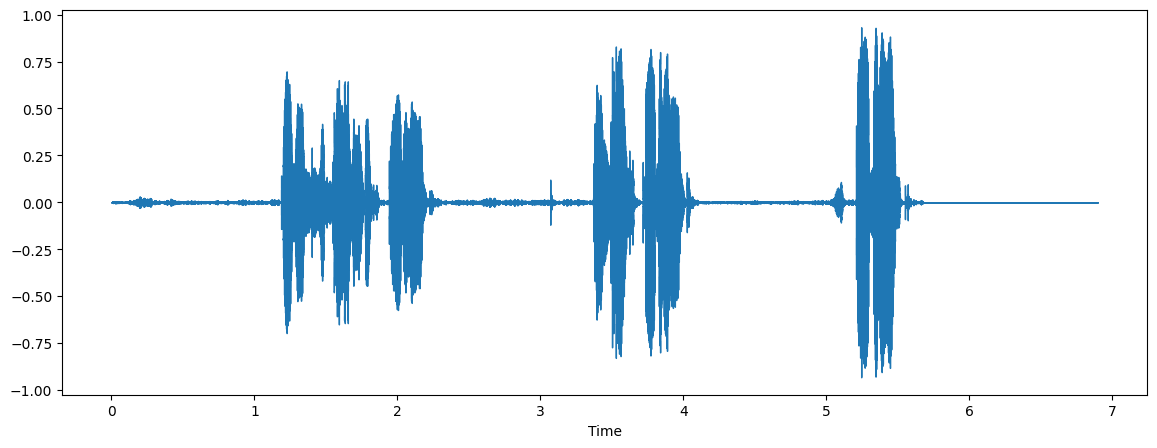

In [23]:
import matplotlib.pyplot as plt

# выведем временной ряд сигнала
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.show()

Обрезка аудио

По графику временного ряда удобно выделять какие-то фрагменты аудио, например, отдельные слова человеческой речи. Делается это при помощи обычной индексации.

In [24]:
# начало отрезка
start = int(22050*4.7)

# конец отрезка
end = int(22050*6)

# выделим часть сигнала авто
Audio(data=y[start:end], rate=sr)

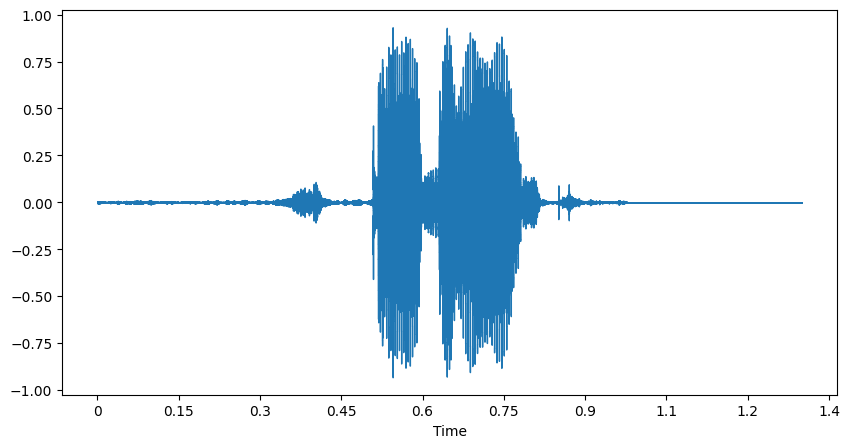

In [25]:
# выведем временной ряд фразы "на практике"
plt.figure(figsize=(10,5))
librosa.display.waveshow(y[start:end], sr=sr)
plt.show()

Изменение скорости воспроизведения аудио

In [26]:
# загрузка аудио
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близко/Передвигайся вперед.WAV')

# воспроизведем сигнал
Audio(data=y, rate=sr)

Возьмем не все значения сигнала, а каждое второе.

In [27]:
# возьмем каждое второе значение сигнала
Audio(data=y[::2], rate=sr)

Так как частота дискретизации осталась той же, а фреймов стало в 2 раза меньше, то мы получили ускоренную запись.

Такого же результата можно добиться путем увеличения частоты дискретизации.

In [28]:
#увеличим частоту дискретизации в 2 раза
Audio(data=y, rate=sr*2)

In [29]:
# уменьшим частоту дискретизации в 2 раза
Audio(data=y, rate=sr/2)

Запись в файл

Чтобы сохранить временной ряд в аудиофайл используется функция write() библиотеки soundfile. Возможность сохранения сырых данных в файл была в библиотеке librosa до версии 0.8.0, в последующих версиях эту функцию удалили.

In [30]:
import soundfile as sf

# загрузка аудио
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близко/Передвигайся вперед.WAV')

# сохраним "передвигайся вперед" в ускоренном варианте
sf.write('fast_song.wav', y, sr*2)

Спектрограмма

Если необходимо визуализировать временной ряд не только в разрезе времени и мощности сигнала, но и частоты, то для этого можно построить спектрограмму.

С помощью спектрограммы можно анализировать запись и находить в ней проблемные места — кашель, скрип, звонок телефона, свист и так далее.

In [32]:
# загрузка аудио
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близко/Передвигайся вперед.WAV')

# воспроизведем сигнал
Audio(data=y, rate=sr)

# начало отрезка
start = int(22050*4.7)

# конец отрезка
end = int(22050*6)

# выделим часть сигнала авто
Audio(data=y[start:end], rate=sr)

In [33]:
import numpy as np

# зададим частоту дискретизации
framerate = 44100

# фреймы (5 секунд по 44100 фрейма каждая)
t = np.linspace(0,5,framerate*5)

# сигнал с заданными параметрами
data = np.sin(2*np.pi*440*t)

# воспроизведем результат
Audio(data,rate=framerate)

Визуализируем фразу "вперед" в виде спектрограммы

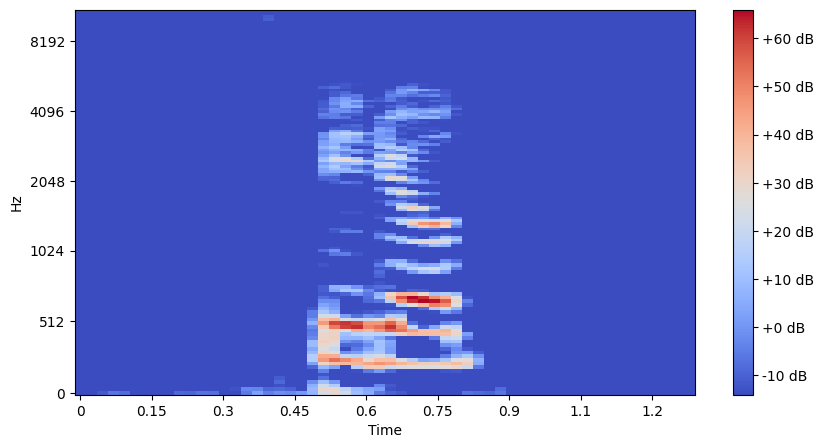

In [34]:
# вычисляем спектрограмму
S = librosa.feature.melspectrogram(y=y[start:end], sr=sr)

# переводим значения амплитуды в децибелы
S_dB = librosa.amplitude_to_db(S)

# отрисовываем результат на графике
plt.figure(figsize = (10,5))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.show()

2.  Загружаем второй аудиофайл"Голос близко. Передвигайся назад!".

Обрабатываем аудиоданные с помощью различных библиотек и составляем спектрограму.

IPython

Воспроизведение файла.

In [35]:
from pydub import AudioSegment
# чтение из файла любого формата
golos_nazad = AudioSegment.from_file(file='/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близко/Передвигайся назад.WAV', format='WAV')

In [ ]:
# воспроизведение файла
golos_nazad

Параметры аудиофайла

In [ ]:
# тип данных
print(type(golos_nazad))

# продолжительность аудио (секунды)
print(golos_nazad.duration_seconds)

# частота дискретизаци
print(golos_nazad.frame_rate)

# количество каналов
print(golos_nazad.channels)

<class 'pydub.audio_segment.AudioSegment'>
6.696
48000
2


Librosa

Загрузка файла

In [ ]:
import librosa

# загрузка аудио
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близко/Передвигайся назад.WAV')

# воспроизведем сигнал
Audio(data=y, rate=sr)

In [ ]:
# частота дискретизации
print(sr)

22050


In [ ]:
# значения амплитуды
print(len(y))
print(y)

147647
[ 1.19053595e-07 -1.46141792e-06 -7.83908661e-07 ... -5.45857029e-06
 -5.49698234e-06 -5.00514761e-06]


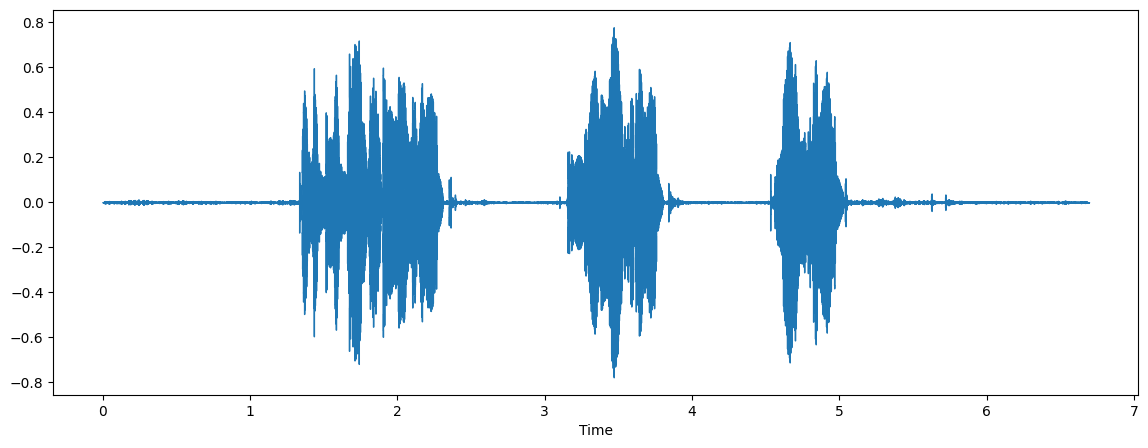

In [ ]:
import matplotlib.pyplot as plt

# выведем временной ряд сигнала
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.show()

Визуализируем фразу "вперед" в виде спектрограммы

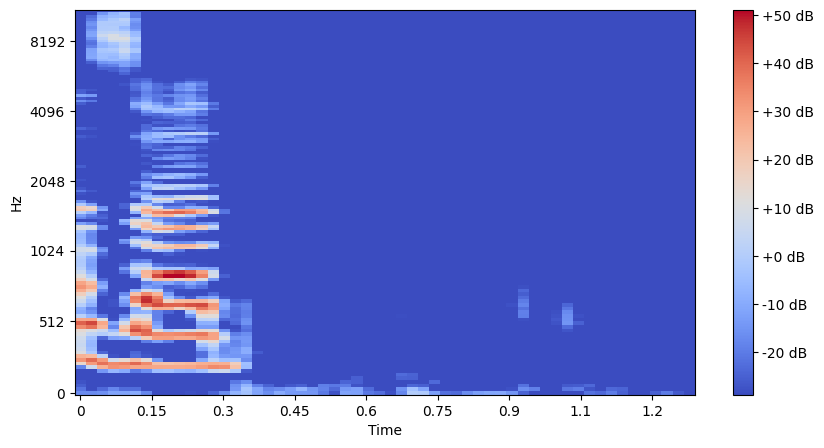

In [ ]:
# вычисляем спектрограмму
S = librosa.feature.melspectrogram(y=y[start:end], sr=sr)

# переводим значения амплитуды в децибелы
S_dB = librosa.amplitude_to_db(S)

# отрисовываем результат на графике
plt.figure(figsize = (10,5))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.show()

3.  Загружаем третий аудиофайл"Голос шагоход близко. Включай автоматический режим движения".

Обрабатываем аудиоданные с помощью различных библиотек и составляем спектрограму.

IPython

Воспроизведение файла.

In [ ]:
from pydub import AudioSegment
# чтение из файла любого формата
golos_shag_vkluchai = AudioSegment.from_file(file='/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос шагоход близко/Включай автоматический режим движения.WAV', format='WAV')

In [ ]:
# воспроизведение файла
golos_shag_vkluchai

Параметры аудиофайла

In [ ]:
# тип данных
print(type(golos_shag_vkluchai))

# продолжительность аудио (секунды)
print(golos_shag_vkluchai.duration_seconds)

# частота дискретизаци
print(golos_shag_vkluchai.frame_rate)

# количество каналов
print(golos_shag_vkluchai.channels)

<class 'pydub.audio_segment.AudioSegment'>
7.358666666666666
48000
2


Librosa

Загрузка файла

In [ ]:
import librosa

# загрузка аудио
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос шагоход близко/Включай автоматический режим движения.WAV')

# воспроизведем сигнал
Audio(data=y, rate=sr)

In [ ]:
# частота дискретизации
print(sr)

22050


In [ ]:
# значения амплитуды
print(len(y))
print(y)

162259
[-3.0394443e-07 -1.0276350e-06 -2.9449793e-06 ... -8.0084437e-06
 -8.9300929e-06 -7.2113608e-06]


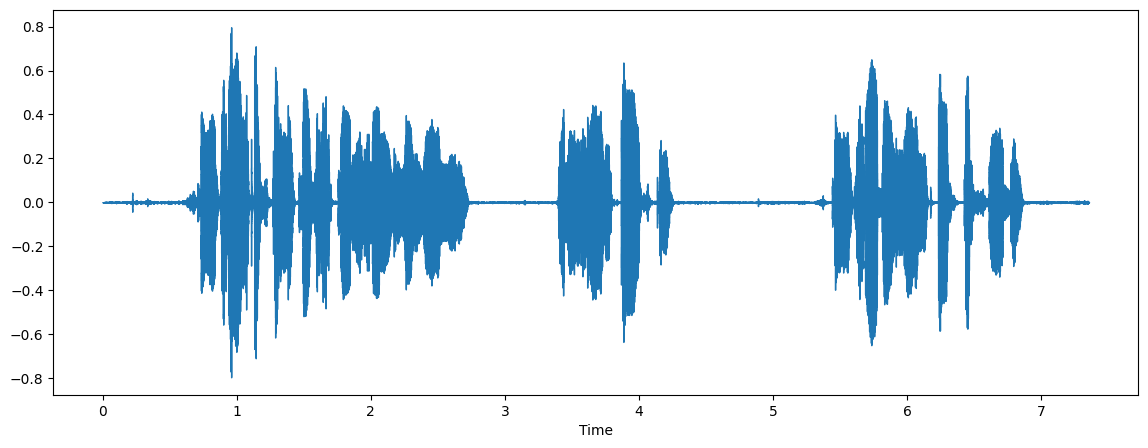

In [ ]:
import matplotlib.pyplot as plt

# выведем временной ряд сигнала
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.show()

Визуализируем фразу "Включай автоматический режим движения. Режим авто. Режим автохода" в виде спектрограммы

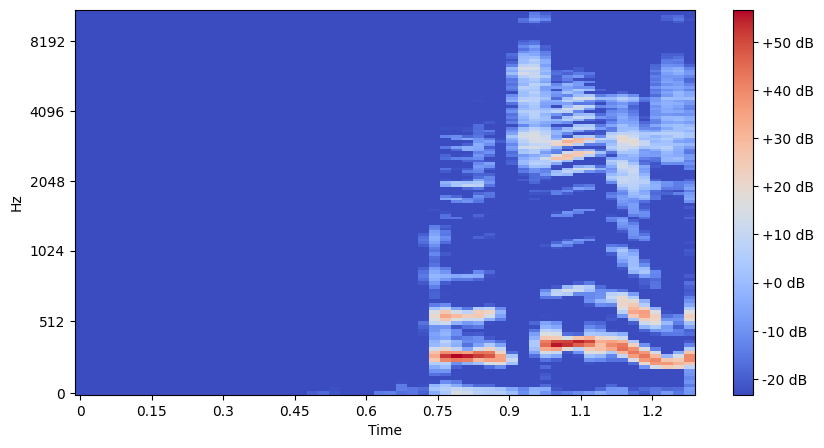

In [ ]:
# вычисляем спектрограмму
S = librosa.feature.melspectrogram(y=y[start:end], sr=sr)

# переводим значения амплитуды в децибелы
S_dB = librosa.amplitude_to_db(S)

# отрисовываем результат на графике
plt.figure(figsize = (10,5))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.show()

4. Загружаем четвертый аудиофайл"Голос шагоход близко. Возвращайся в начальную точку".
Обрабатываем аудиоданные с помощью различных библиотек и составляем спектрограму.

IPython

Воспроизведение файла.

In [ ]:
from pydub import AudioSegment
# чтение из файла любого формата
golos_shag_voztoch = AudioSegment.from_file(file='/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос шагоход близко/Возвращайся в начальную точку.WAV', format='WAV')

In [ ]:
# воспроизведение файла
golos_shag_voztoch

Параметры аудиофайла

In [ ]:
# тип данных
print(type(golos_shag_voztoch))

# продолжительность аудио (секунды)
print(golos_shag_voztoch.duration_seconds)

# частота дискретизаци
print(golos_shag_voztoch.frame_rate)

# количество каналов
print(golos_shag_voztoch.channels)

<class 'pydub.audio_segment.AudioSegment'>
7.029333333333334
48000
2


Librosa

Загрузка файла

In [ ]:
import librosa

# загрузка аудио
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос шагоход близко/Возвращайся в начальную точку.WAV')

# воспроизведем сигнал
Audio(data=y, rate=sr)

In [ ]:
# частота дискретизации
print(sr)

22050


In [ ]:
# значения амплитуды
print(len(y))
print(y)

154997
[-1.3369824e-07 -3.7128586e-07 -1.2656467e-06 ... -2.9264399e-06
 -3.1502482e-06 -3.2876460e-06]


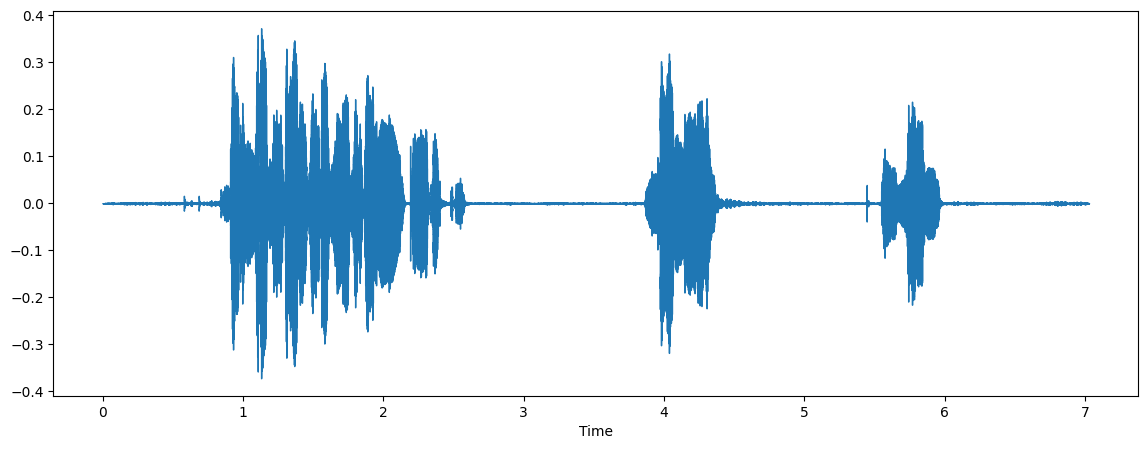

In [ ]:
import matplotlib.pyplot as plt

# выведем временной ряд сигнала
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.show()

Визуализируем фразу "Возвращайся в начальную точку. Домой. Ждем." в виде спектрограммы

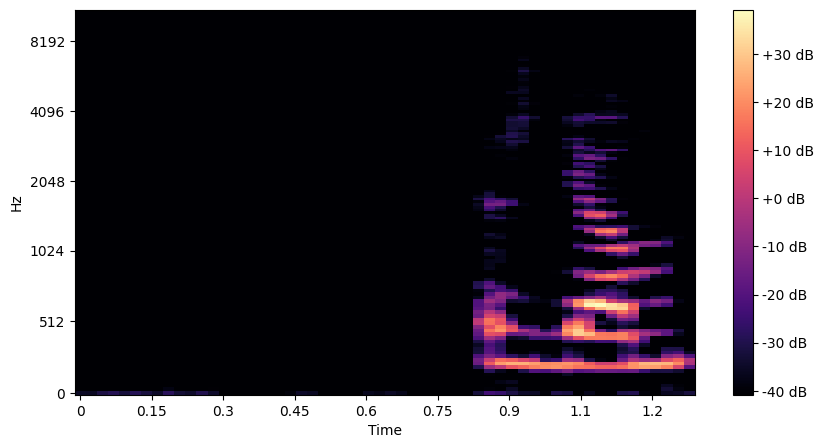

In [ ]:
# вычисляем спектрограмму
S = librosa.feature.melspectrogram(y=y[start:end], sr=sr)

# переводим значения амплитуды в децибелы
S_dB = librosa.amplitude_to_db(S)

# отрисовываем результат на графике
plt.figure(figsize = (10,5))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.show()

5. Загружаем пятый аудиофайл"Голос шагоход близко. Остановись. Стой.  Стоп." Обрабатываем аудиоданные с помощью различных библиотек и составляем спектрограму.

IPython

Воспроизведение файла.

In [ ]:
from pydub import AudioSegment
# чтение из файла любого формата
golos_shag_stoped = AudioSegment.from_file(file='/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос шагоход близко/Остановись.WAV', format='WAV')

In [ ]:
# воспроизведение файла
golos_shag_stoped

Параметры аудиофайла

In [ ]:
# тип данных
print(type(golos_shag_stoped))

# продолжительность аудио (секунды)
print(golos_shag_stoped.duration_seconds)

# частота дискретизаци
print(golos_shag_stoped.frame_rate)

# количество каналов
print(golos_shag_stoped.channels)

<class 'pydub.audio_segment.AudioSegment'>
6.36
48000
2


Librosa

Загрузка файла

In [ ]:
import librosa

# загрузка аудио
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос шагоход близко/Остановись.WAV')

# воспроизведем сигнал
Audio(data=y, rate=sr)

In [ ]:
# частота дискретизации
print(sr)

22050


In [ ]:
# значения амплитуды
print(len(y))
print(y)

140238
[ 3.2375038e-07  2.8746501e-06  6.2988706e-06 ... -5.4183110e-06
 -4.7756785e-06 -4.6691043e-06]


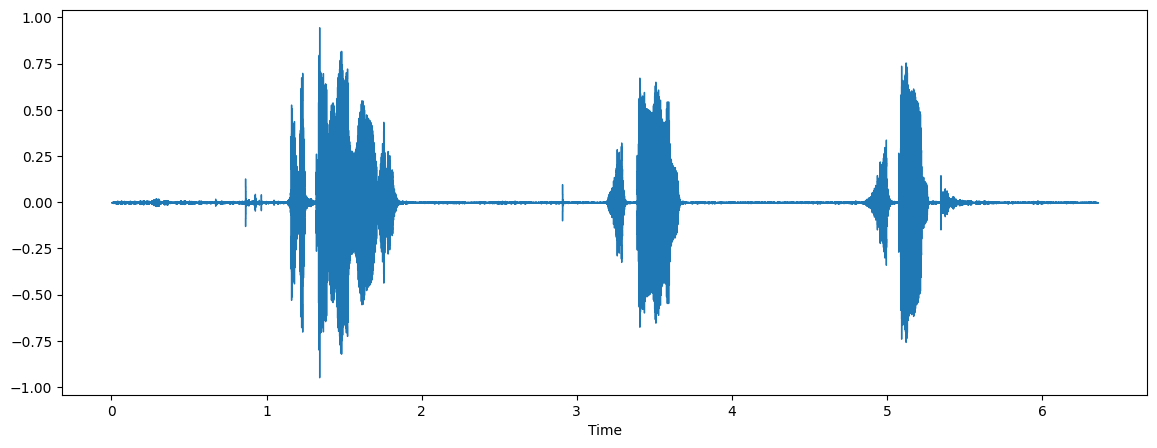

In [ ]:
import matplotlib.pyplot as plt

# выведем временной ряд сигнала
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.show()

Визуализируем фразу "Остановись. Стой. Стоп." в виде спектрограммы

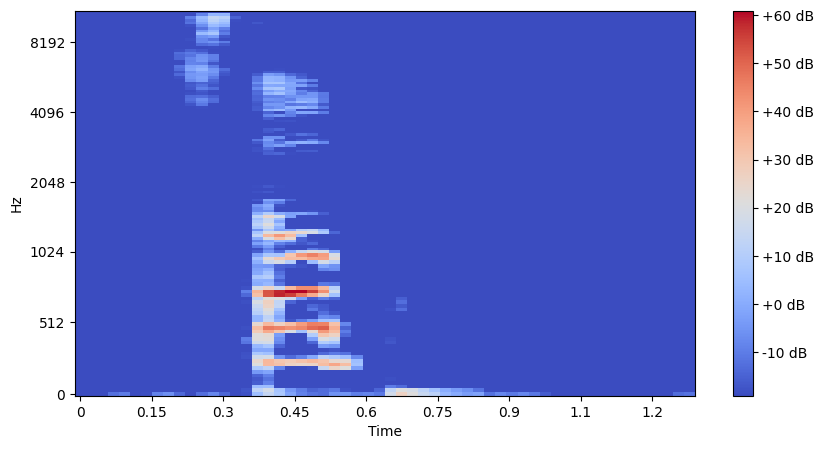

In [ ]:
# вычисляем спектрограмму
S = librosa.feature.melspectrogram(y=y[start:end], sr=sr)

# переводим значения амплитуды в децибелы
S_dB = librosa.amplitude_to_db(S)

# отрисовываем результат на графике
plt.figure(figsize = (10,5))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.show()

In [36]:
# librosa

import librosa
import IPython
import matplotlib.pyplot as plt
import librosa.display as ld

signal, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близко/Передвигайся вперед.WAV')

Подход второй 04.11.2023

Текущая задача: Предобработка аудио-данных, разработка алгоритма параметризации, подготовка данных для подачи в нейросеть

Разделение всех файлов, которые содержат в себе вариации команды

In [37]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

first_part_name = '/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близко/Передвигайся вперед.WAV'

In [38]:
def split_audio(file_name):

    audio = AudioSegment.from_file(file_name)

    phrases = split_on_silence(audio, min_silence_len=500, silence_thresh=-50)

    command_name = file_name[46:-4]

    for i, phrase in enumerate(phrases):
        phrase.export(f"{first_part_name}{command_name}_{i}.wav", format="wav")

Генерация различных признаков аудио с помощью librosa

In [39]:
import librosa                            # Параметризация аудио
import librosa.display                    # Визуализация аудио
import matplotlib.pyplot as plt           # Отрисовка графиков
import IPython.display as ipd             # Проигрывание аудио в colab
import gdown                              # Загрузка датасетов из облака

# Нормирование сигнала
from sklearn.preprocessing import minmax_scale, scale

%matplotlib inline

In [40]:
# Функция загрузки аудио и вывода текстовой информации
# о сигнале, а также проигрывателя аудио

def load_audio(audio_path,       # путь к файлу с аудио
               show_text=True,   # показывать ли текстовую сводку по аудио
               show_player=True  # выводить ли проигрыватель в ячейку
               ):
    # Загрузка аудиофайла, на выходе:
    # x  - массив данных временного ряда аудио
    # sr - частота дискретизации временного ряда
    x, sr = librosa.load(audio_path)

    if show_text:
        # Вывод текстовых данных о сигнале
        print(f'Типы данных x и sr: {type(x)}, {type(sr)}')
        print(f'Форма данных x: {x.shape}, sr = {sr}')
        print('Продолжительность сигнала:', round(x.shape[0]/sr), 'с.\n')

    if show_player:
        # Вывод проигрывателя в ячейку colab
        ipd.display(ipd.Audio(audio_path))

    # Возврат загруженных данных для дальнейшего использования
    return x, sr

In [41]:
x, sr = load_audio('/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близко/Передвигайся вперед.WAV')



Типы данных x и sr: <class 'numpy.ndarray'>, <class 'int'>
Форма данных x: (152145,), sr = 22050
Продолжительность сигнала: 7 с.



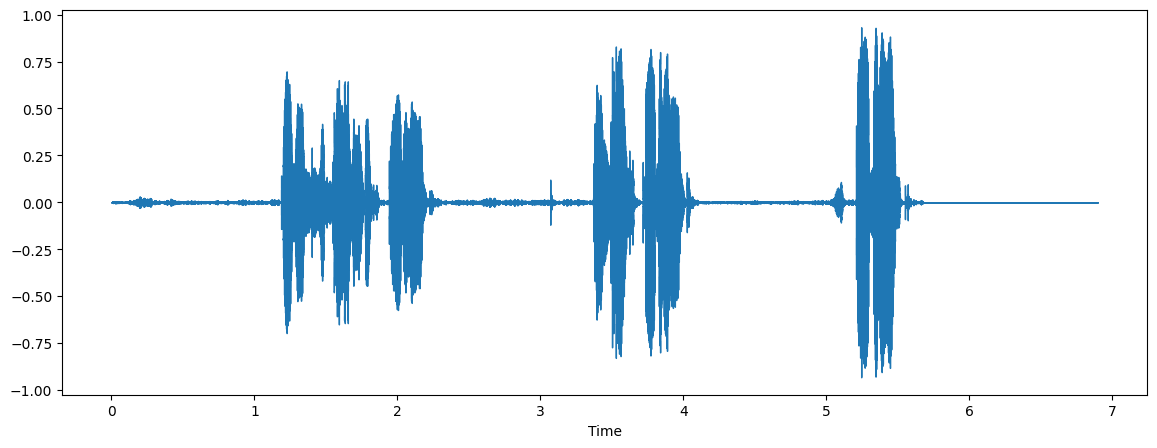

In [42]:
# Вывод сигнала на экран

plt.figure(figsize=(14, 5))               # Задание размера полотна
librosa.display.waveshow(x, sr=sr)        # Построение амплитудного представления сигнала
plt.show()

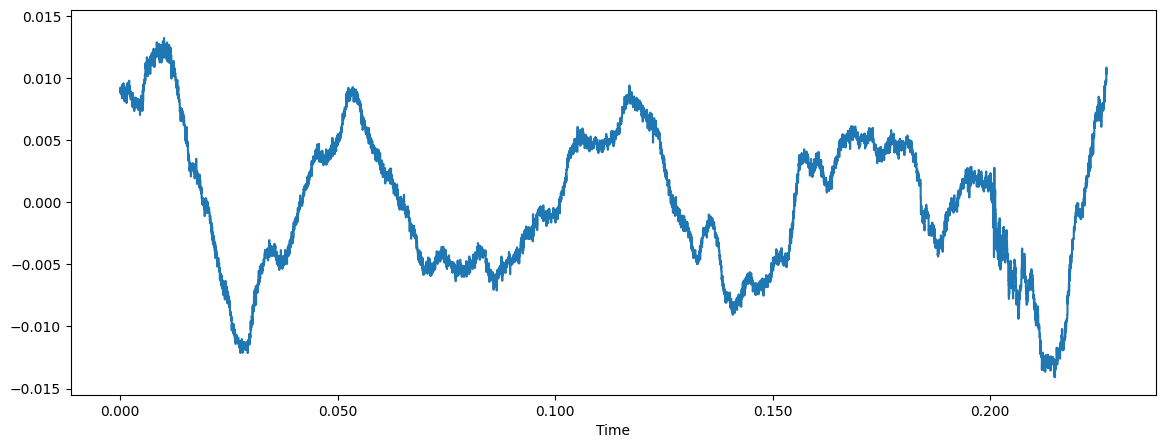

In [43]:
# Вывод сигнала в более разреженном виде

plt.figure(figsize=(14, 5))               # Задание размера полотна
librosa.display.waveshow(x[20000:25000], sr=sr) # Первые 1000 значений амплитуды сигнала
plt.show()                                # Вывод графика

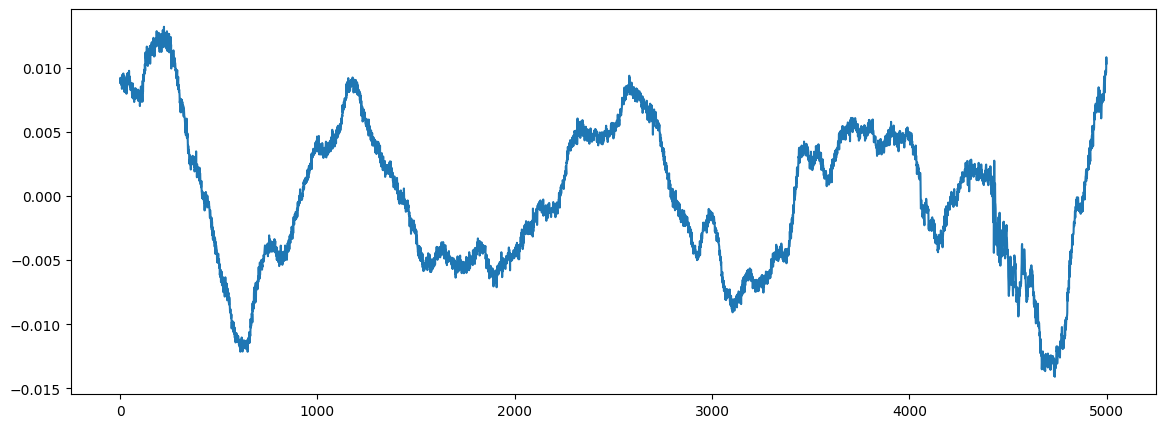

In [44]:
# Вывод собственно волны сигнала в более разреженном виде
plt.figure(figsize=(14, 5))               # Задание размера полотна
plt.plot(x[20000:25000])                        # Первые 1000 значений амплитуды сигнала
plt.show()                                # Вывод графика


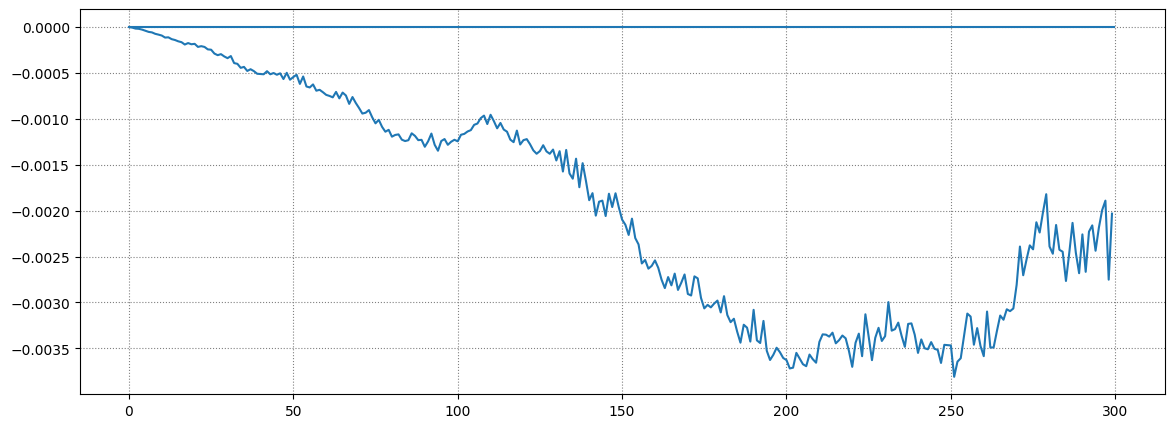

In [45]:
# Детальное отображение части волны сигнала
n0 = 0                                    # Начальная точка
n1 = 300                                  # Конечная точка

# Вывод волны сигнала от начальной точки до конечной
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.hlines(0, n0, n1)
plt.grid(color = 'gray', linestyle = ':')
plt.show()


In [46]:
# Вычисление пересечений нуля для отрезка сигнала
zero_crossings = librosa.zero_crossings(x[:10], pad=False)

# Выврл результатов
print(f'Суммарное количество пересечений: {sum(zero_crossings)}')
print(f'Маска пересечений в каждой точке: {zero_crossings}')

Суммарное количество пересечений: 0
Маска пересечений в каждой точке: [False False False False False False False False False False]


In [47]:
# Вычисление пересечений нуля для отрезка сигнала
zero_crossings = librosa.zero_crossings(x[:10], pad=False)

# Выврл результатов
print(f'Суммарное количество пересечений: {sum(zero_crossings)}')
print(f'Маска пересечений в каждой точке: {zero_crossings}')

Суммарное количество пересечений: 0
Маска пересечений в каждой точке: [False False False False False False False False False False]


Форма данных сигнала: (152145,)
Форма данных спектрального центроида: (1, 298)



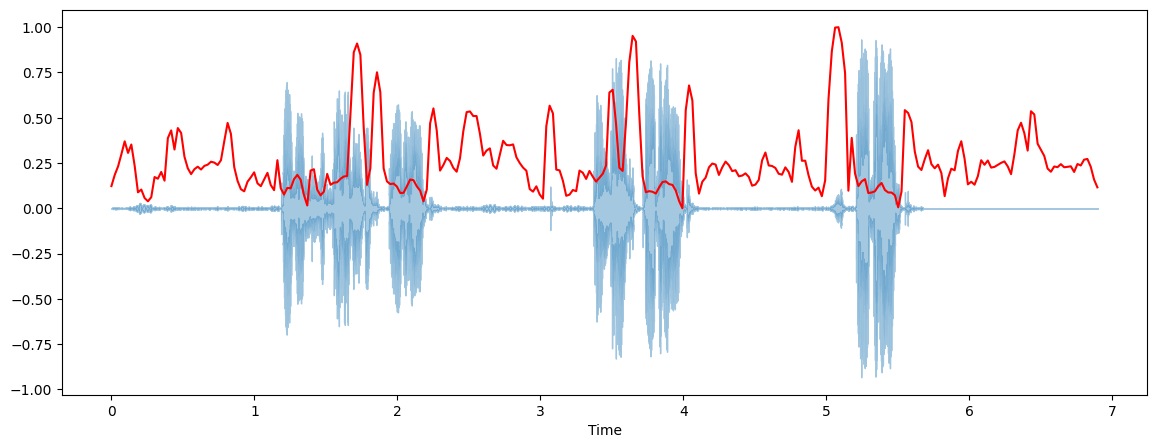

In [48]:
# Вычисление спектрального центроида
spectral_centroid = librosa.feature.spectral_centroid(y=x, sr=sr)

# Проверка формы данных сигнала и центроидов
print(f'Форма данных сигнала: {x.shape}')
print(f'Форма данных спектрального центроида: {spectral_centroid.shape}\n')

# Вычиcление моментов времени для визуализации спектральных центроидов
frames = range(len(spectral_centroid[0]))
t = librosa.frames_to_time(frames)

# Построение совместного графика сигнала и спектрального центроида
plt.figure(figsize=(14, 5))
# Вывод графика амплитуды сигнала
librosa.display.waveshow(x, sr=sr, alpha=0.4)
# Вывод графика нормализованного спектрального центроида
plt.plot(t, minmax_scale(spectral_centroid[0], axis=0), color='r')
plt.show()

Форма данных сигнала: (152145,)
Форма данных спектрального спада: (1, 298)



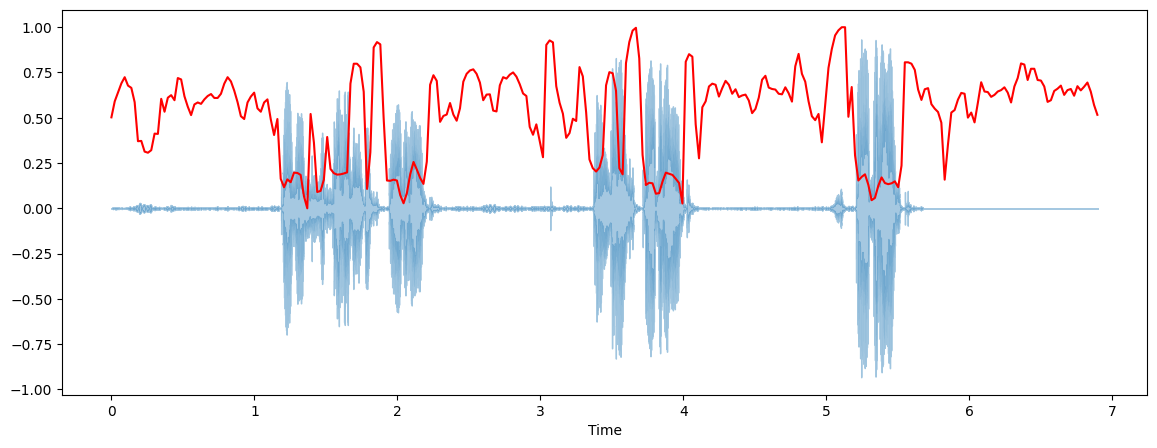

In [49]:
# Вычисление спектрального спада
spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr, roll_percent=0.85)

# Проверка формы данных сигнала и спектрального спада
print(f'Форма данных сигнала: {x.shape}')
print(f'Форма данных спектрального спада: {spectral_rolloff.shape}\n')

# Вычиcление моментов времени для визуализации спектрального спада
frames = range(len(spectral_rolloff[0]))
t = librosa.frames_to_time(frames)

# Построение совместного графика сигнала и спектрального спада
plt.figure(figsize=(14, 5))
# Вывод графика амплитуды сигнала
librosa.display.waveshow(x, sr=sr, alpha=0.4)
# Вывод графика нормализованного спектрального спада
plt.plot(t, minmax_scale(spectral_rolloff[0], axis=0), color='r')
plt.show()

Форма данных мел-коэффициентов: (20, 298)



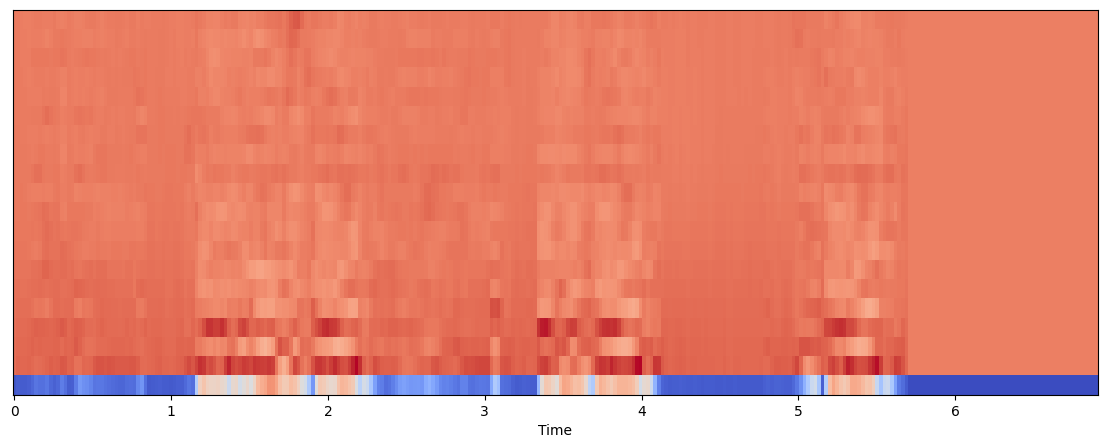

In [50]:
# Вычисление и отображение мел-частотных кепстральных коэффициентов
mfcc = librosa.feature.mfcc(y=x, sr=sr)
print(f'Форма данных мел-коэффициентов: {mfcc.shape}\n')

plt.figure(figsize=(14, 5))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.show()


Средние значения:
[ 2.5601995e-08  0.0000000e+00 -1.6001247e-09  6.4004988e-09
 -6.4004988e-09  0.0000000e+00  9.6007478e-09 -1.9201496e-08
 -9.6007478e-09 -6.4004988e-09 -6.4004988e-09 -2.5601995e-08
  0.0000000e+00 -6.4004988e-09 -1.2800998e-08  2.5601995e-08
  0.0000000e+00  0.0000000e+00  4.8003739e-09 -6.4004988e-09]

Среднеквадратические отклонения:
[0.99999994 1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.9999999  1.
 1.         1.         1.         0.99999994 1.         1.
 1.         1.        ]



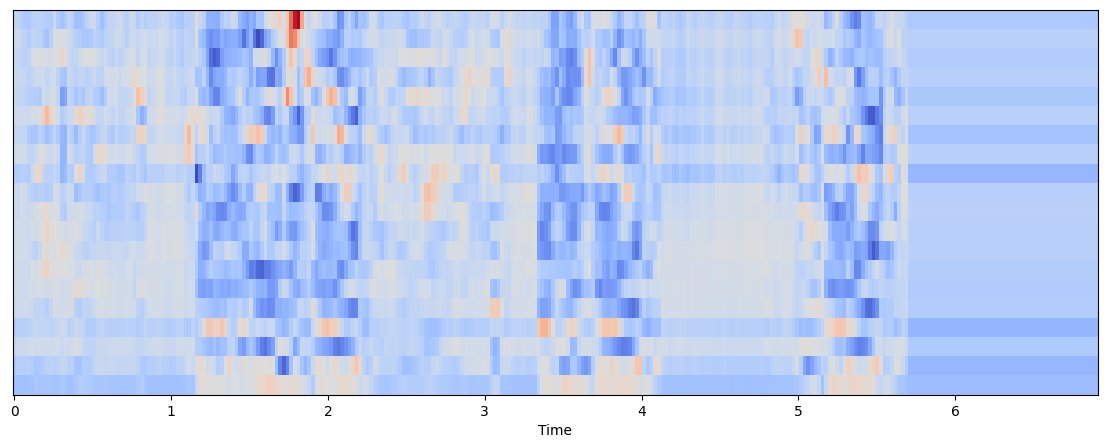

In [51]:
# Вывод мел-коэффициентов в нормированном виде

# Нормирование мел-коэффициентов
normalized_mfcc = scale(mfcc, axis=1)

# Проверка нормирования
print(f'Средние значения:\n{normalized_mfcc.mean(axis=1)}\n')
print(f'Среднеквадратические отклонения:\n{normalized_mfcc.std(axis=1)}\n')

# Визуализация нормированных коэффициентов
plt.figure(figsize=(14, 5))
librosa.display.specshow(normalized_mfcc, sr=sr, x_axis='time')
plt.show()


Форма данных хромаграммы:(12, 298)



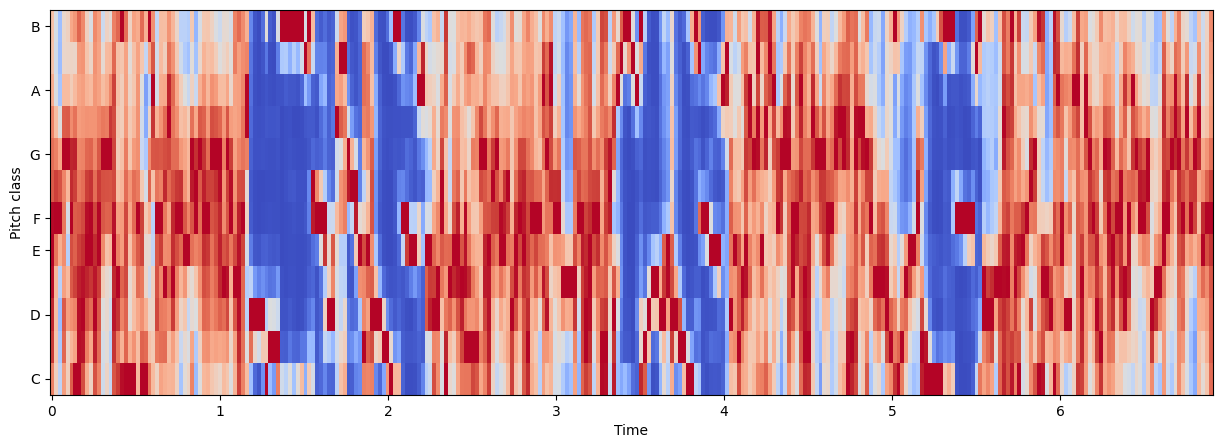

In [52]:
# Задание шага скользящего окна (в семплах)
hop_length = 512

# Вычисление хромаграммы (подразумевает вычисление спектра)
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)

# Проверка результатов
print(f'\nФорма данных хромаграммы:{chromagram.shape}\n')

# Вывод хромаграммы
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.show()

Расширение датасета
Источник модели для генерации https://habr.com/ru/articles/660565/

In [53]:
!pip install -q torchaudio omegaconf

import torch
from pprint import pprint
from omegaconf import OmegaConf
from IPython.display import Audio, display

import os
import wave
import contextlib

torch.hub.download_url_to_file('https://raw.githubusercontent.com/snakers4/silero-models/master/models.yml',
                               'latest_silero_models.yml',
                               progress=False)
models = OmegaConf.load('latest_silero_models.yml')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [54]:
# посмотреть последние доступные модели
available_languages = list(models.tts_models.keys())
print(f'Available languages {available_languages}')

for lang in available_languages:
    _models = list(models.tts_models.get(lang).keys())
    print(f'Available models for {lang}: {_models}')

Available languages ['ru', 'en', 'de', 'es', 'fr', 'ba', 'xal', 'tt', 'uz', 'ua', 'indic', 'cyrillic', 'multi']
Available models for ru: ['v4_ru', 'v3_1_ru', 'ru_v3', 'aidar_v2', 'aidar_8khz', 'aidar_16khz', 'baya_v2', 'baya_8khz', 'baya_16khz', 'irina_v2', 'irina_8khz', 'irina_16khz', 'kseniya_v2', 'kseniya_8khz', 'kseniya_16khz', 'natasha_v2', 'natasha_8khz', 'natasha_16khz', 'ruslan_v2', 'ruslan_8khz', 'ruslan_16khz']
Available models for en: ['v3_en', 'v3_en_indic', 'lj_v2', 'lj_8khz', 'lj_16khz']
Available models for de: ['v3_de', 'thorsten_v2', 'thorsten_8khz', 'thorsten_16khz']
Available models for es: ['v3_es', 'tux_v2', 'tux_8khz', 'tux_16khz']
Available models for fr: ['v3_fr', 'gilles_v2', 'gilles_8khz', 'gilles_16khz']
Available models for ba: ['aigul_v2']
Available models for xal: ['v3_xal', 'erdni_v2']
Available models for tt: ['v3_tt', 'dilyara_v2']
Available models for uz: ['v4_uz', 'v3_uz', 'dilnavoz_v2']
Available models for ua: ['v4_ua', 'v3_ua', 'mykyta_v2']
Availab

In [55]:
import torch

language = 'ru'
model_id = 'v4_ru'
device = torch.device('cpu')

model, example_text = torch.hub.load(repo_or_dir='snakers4/silero-models',
                                     model='silero_tts',
                                     language=language,
                                     speaker=model_id)
model.to(device)  # gpu or cpu

Downloading: "https://github.com/snakers4/silero-models/zipball/master" to /root/.cache/torch/hub/master.zip
100%|██████████| 38.2M/38.2M [00:01<00:00, 20.4MB/s]


In [56]:
speakers = model.speakers
speakers

['aidar', 'baya', 'kseniya', 'xenia', 'eugene', 'random']

In [57]:
def write_wave(path, audio, sample_rate):
    """Writes a .wav file.
    Takes path, PCM audio data, and sample rate.
    """
    with contextlib.closing(wave.open(path, 'wb')) as wf:
        wf.setnchannels(1)
        wf.setsampwidth(2)
        wf.setframerate(sample_rate)
        wf.writeframes(audio)

In [58]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близко'

speakers = model.speakers

sample_rate = 48000
put_accent=True
put_yo=True

command_list = ['Остановись', 'Передвигайся вперед', 'Закрывай захват']

In [81]:
for command in command_list:

  new_dir = f"{data_path}{command}"
  os.mkdir(new_dir)

  for speaker in speakers:

    audio = model.apply_tts(text=command,
                            speaker=speaker,
                            sample_rate=sample_rate,
                            put_accent=put_accent,
                            put_yo=put_yo)

    write_wave(path=f"{new_dir}/{speaker}.wav",
               audio=(audio * 32767).numpy().astype('int16'),
               sample_rate=sample_rate)


FileExistsError: ignored

In [81]:
from IPython.display import Audio, display

audio_path = "/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близкоОстановись/eugene.wav"
display(Audio(filename=audio_path, rate=sample_rate))

In [83]:
N = 20
speaker = 'random'

for i, command in enumerate(command_list):
    for i in range(N):
        # Привести sample_rate к целому числу
        sample_rate = int(sample_rate)

        audio = model.apply_tts(text=command,
                                speaker=speaker,
                                sample_rate=sample_rate)

        write_wave(path=f"{data_path}{command}/random_00{i}.wav",
                   audio=(audio * 32767).numpy().astype('int16'),
                   sample_rate=sample_rate)


Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice
Generated new voice


In [60]:
from IPython.display import Audio, display

# Привести sample_rate к целому числу
sample_rate = int(sample_rate)

# Используйте абсолютный путь к файлу
audio_path = '/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близкоОстановись/eugene.wav'
display(Audio(filename=audio_path, rate=sample_rate))

In [61]:
from pydub import AudioSegment

# Полный путь к аудиофайлу
file_path = '/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близкоОстановись/random.wav'

# Загрузка аудиофайла с использованием PyDub
voice_command = AudioSegment.from_file(file_path, format="wav")

# Проверка длительности аудиофайла
print("Длительность:", len(voice_command) / 1000, "секунд")



Длительность: 0.8 секунд


In [62]:
from pydub import AudioSegment
from pydub.playback import play

# Полный путь к аудиофайлу
file_path = '/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близкоОстановись/eugene.wav'

# Загрузка аудиофайла с использованием PyDub
voice_command = AudioSegment.from_file(file_path, format="wav")

# Проверка длительности аудиофайла
print("Длительность:", len(voice_command) / 1000, "секунд")

# Воспроизведение аудиофайла
play(voice_command)


Длительность: 0.75 секунд


Подача в нейросеть

In [63]:
# Массивы
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Связь с google диском
from google.colab import drive

# Загрузка из google облака
import gdown

# Преобразование категориальных данных в one hot encoding
from tensorflow.keras.utils import to_categorical

# Работа с папками и файлами
import os

# Утилиты работы со временем
import time

# Работа со случайными числами
import random

# Математические функции
import math

# Сохранение и загрузка структур данных Python
import pickle

# Параметризация аудио
import librosa

# Оптимизаторы для обучения моделей
from tensorflow.keras.optimizers import Adam, RMSprop

# Конструирование и загрузка моделей нейронных сетей
from tensorflow.keras.models import Sequential, Model, load_model

# Основные слои
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM

# Разбиение на обучающую и проверочную выборку
from sklearn.model_selection import train_test_split

# Кодирование категориальных меток, нормирование числовых данных
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



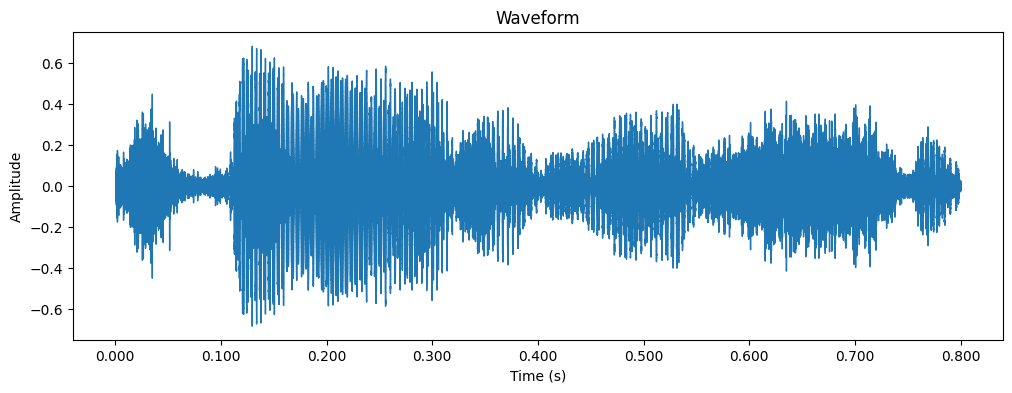

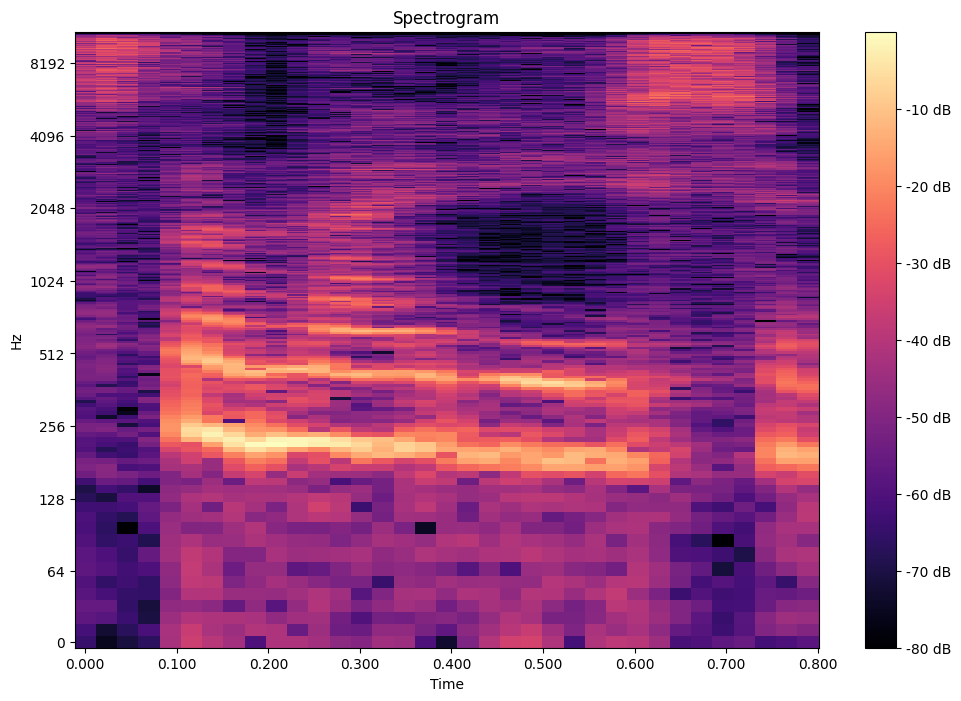

In [64]:
# Загрузка аудиофайла
audio_path = '/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близкоОстановись/random.wav'

# Загрузка аудиофайла с использованием librosa
audio, sample_rate = librosa.load(audio_path)

# Отображение аудиосигнала
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Построение и отображение спектрограммы
plt.figure(figsize=(12, 8))
specgram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(specgram, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


In [65]:
# Папка с файлами датасета
FILE_DIR = '/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близкоОстановись'

# Получение списка файлов в папке
file_list = os.listdir(FILE_DIR)

# Извлечение уникальных классов из имен файлов
CLASS_LIST = list(set([file.split('.')[0] for file in file_list]))
CLASS_LIST.sort()

# Сортировка списка классов для фиксации порядка меток
CLASS_COUNT = len(CLASS_LIST)             # Количество классов
CLASS_FILES = 100                         # Общее количество файлов в каждом классе
FILE_INDEX_TRAIN_SPLIT = 90               # Количество файлов каждого класса на основной набор
VALIDATION_SPLIT = 0.1                    # Доля проверочной выборки в основном наборе
DURATION_SEC = 2                          # Анализируемая длительность аудиосигнала
N_FFT = 8192                              # Размер окна преобразования Фурье для расчета спектра
HOP_LENGTH = 512                          # Объем данных для расчета одного набора признаков


In [66]:
print(CLASS_LIST)

['aidar', 'baya', 'eugene', 'kseniya', 'random', 'random_000', 'random_001', 'random_0010', 'random_0011', 'random_0012', 'random_0013', 'random_0014', 'random_0015', 'random_0016', 'random_0017', 'random_0018', 'random_0019', 'random_002', 'random_003', 'random_004', 'random_005', 'random_006', 'random_007', 'random_008', 'random_009', 'xenia']


In [67]:
# Задаем соответствие между текущими классами и желаемыми названиями
CLASS_MAPPING = {
    'aidar': 'Закрывай захват',
    'baya': 'Остановись',
    'eugene': 'Передвигайся вперед',
    # Добавьте другие классы согласно вашему датасету
}

# Создаем новый список классов на основе словаря
CLASS_LIST = [CLASS_MAPPING.get(cls, cls) for cls in CLASS_LIST]


In [68]:
print(CLASS_LIST)

['Закрывай захват', 'Остановись', 'Передвигайся вперед', 'kseniya', 'random', 'random_000', 'random_001', 'random_0010', 'random_0011', 'random_0012', 'random_0013', 'random_0014', 'random_0015', 'random_0016', 'random_0017', 'random_0018', 'random_0019', 'random_002', 'random_003', 'random_004', 'random_005', 'random_006', 'random_007', 'random_008', 'random_009', 'xenia']


In [69]:
# Функция параметризации аудио

def get_features(y,                     # волновое представление сигнала
                 sr,                    # частота дискретизации сигнала y
                 n_fft=N_FFT,           # размер скользящего окна БПФ
                 hop_length=HOP_LENGTH  # шаг скользящего окна БПФ
                 ):
    # Вычисление различных параметров (признаков) аудио

    # Среднеквадратическая амплитуда
    rmse = librosa.feature.rms(y=y, hop_length=hop_length)
    # Спектральный центроид
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    # Ширина полосы частот
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    # Спектральный спад частоты
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    # Пересечения нуля
    zcr = librosa.feature.zero_crossing_rate(y, hop_length=hop_length)
    # Мел-кепстральные коэффициенты
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    # Хромаграмма
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # Сборка параметров в общий список:
    # На один файл один усредненный вектор признаков
    features = {'rmse': rmse.mean(axis=1, keepdims=True),
                'spct': spec_cent.mean(axis=1, keepdims=True),
                'spbw': spec_bw.mean(axis=1, keepdims=True),
                'roff': rolloff.mean(axis=1, keepdims=True),
                'zcr' : zcr.mean(axis=1, keepdims=True),
                'mfcc': mfcc.mean(axis=1, keepdims=True),
                'stft': chroma_stft.mean(axis=1, keepdims=True)}

    return features

In [70]:
# Функция объединения признаков в набор векторов

def stack_features(feat  # словарь признаков, отдельные векторы по ключу каждого признака
                   ):
    features = None
    for v in feat.values():
        features = np.vstack((features, v)) if features is not None else v

    return features.T

In [73]:
import os

file_path = os.path.join(FILE_DIR, '/content/drive/MyDrive/Colab Notebooks/Стажировки /Стажировки Роботы игрушки/Датасет и тех,задания/Распакованные/голос близкоЗакрывай захват/aidar.wav')

if os.path.exists(file_path):
    y, sr = librosa.load(file_path, mono=True, duration=DURATION_SEC)
    features = get_features(y, sr)
    print("Успешно загружено и параметризовано.")
else:
    print(f"Файл {file_path} не существует.")


Успешно загружено и параметризовано.


In [79]:
print({k: v.shape for k, v in features.items()})

{'rmse': (1, 1), 'spct': (1, 1), 'spbw': (1, 1), 'roff': (1, 1), 'zcr': (1, 1), 'mfcc': (20, 1), 'stft': (12, 1)}


In [80]:
# Проверка формирования набора признаков
feature_set = stack_features(features)
feature_set.shape

(1, 37)

Актуальные вопросы:
аудио файлы разной длины, для обучения нужны данные одной размерности, каким способом оптимально подготовить данные чтобы это учесть?